In [ ]:
1.Select

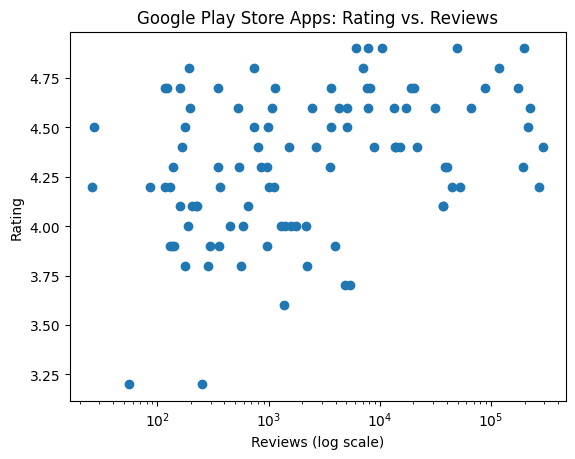

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric for plotting, ensuring data integrity
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)

# Initial scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(data['Reviews'][:100], data['Rating'][:100])  # Limiting to first 100 for performance

selected, = ax.plot([], [], 'o', color='red', markersize=15, markeredgecolor='black')  # Placeholder for selected points

def onpick(event):
    # On pick, update the selected point's data for position and redraw
    ind = event.ind[0]  # Get index of clicked point
    x, y = scatter.get_offsets().data[ind]
    selected.set_data(x, y)
    fig.canvas.draw_idle()

# Connect the pick event to the onpick function
fig.canvas.mpl_connect('pick_event', onpick)

plt.xlabel('Reviews (log scale)')
plt.ylabel('Rating')
plt.xscale('log')  # Using a log scale for reviews due to wide range
plt.title('Google Play Store Apps: Rating vs. Reviews')
scatter.set_picker(True)  # Enable picking on the scatter plot
scatter.set_pickradius(5)  # Set pick radius to make picking easier

plt.show()


In [ ]:
2.Explore

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

data_path = 'googleplaystore.csv'  
data = pd.read_csv(data_path)
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data.dropna(subset=['Rating'], inplace=True)

def plot_histogram(bins):
    plt.figure(figsize=(10, 6))
    plt.hist(data['Rating'], bins=bins, color='skyblue', edgecolor='black')
    plt.title('Distribution of App Ratings in the Google Play Store')
    plt.xlabel('Rating')
    plt.ylabel('Number of Apps')
    plt.show()

# Use interact to create interactive bins slider
interact(plot_histogram, bins=(1, 50, 1))


interactive(children=(IntSlider(value=25, description='bins', max=50, min=1), Output()), _dom_classes=('widget…

<function __main__.plot_histogram(bins)>

In [ ]:
3.Reconfigure

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

data_path = 'googleplaystore.csv'
data = pd.read_csv(data_path)

# Convert 'Reviews' to numeric and clean NaN values
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data = data.dropna(subset=['Rating', 'Reviews'])

# Prepare a simple function to plot the data based on user selection
def update_plot(x_axis, y_axis):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_axis], data[y_axis], alpha=0.5)
    plt.title(f'Scatter Plot: {x_axis} vs. {y_axis}')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.xscale('log') if x_axis == 'Reviews' else plt.xscale('linear')
    plt.yscale('log') if y_axis == 'Reviews' else plt.yscale('linear')
    plt.show()

# Creating dropdowns for the user to select which data to plot on each axis
x_axis_dropdown = Dropdown(options=['Rating', 'Reviews'], description='X-Axis:')
y_axis_dropdown = Dropdown(options=['Rating', 'Reviews'], description='Y-Axis:')

# Display interactive plot
interact(update_plot, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown)


interactive(children=(Dropdown(description='X-Axis:', options=('Rating', 'Reviews'), value='Rating'), Dropdown…

<function __main__.update_plot(x_axis, y_axis)>

In [ ]:
4.Encode

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Select

# Load the dataset
data_path = 'googleplaystore.csv'
data = pd.read_csv(data_path)

# Preprocess the data
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)
data = data.head(500)  # Use a subset for performance

def plot_encoded(x_axis='Reviews', y_axis='Rating', color='Content Rating', size='Reviews'):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Encoding size based on the selected attribute, ensuring it's visually meaningful
    sizes = data[size] / data[size].max() * 100  # Normalize and scale

    scatter = ax.scatter(data[x_axis], data[y_axis], c=pd.Categorical(data[color]).codes, cmap='viridis', s=sizes, alpha=0.6, edgecolors='w')
    
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_title('Google Play Store Apps: Encoded Visualization')
    ax.set_xscale('log')  # Log scale for reviews to handle wide range
    
    # Create a colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(color)
    
    plt.show()

# Interaction widgets for selecting encoding options
interact(plot_encoded,
         x_axis=Select(options=['Reviews', 'Rating'], value='Reviews', description='X-axis'),
         y_axis=Select(options=['Rating', 'Reviews'], value='Rating', description='Y-axis'),
         color=Select(options=data.columns, value='Content Rating', description='Color'),
         size=Select(options=['Reviews', 'Rating'], value='Reviews', description='Size'))


interactive(children=(Select(description='X-axis', options=('Reviews', 'Rating'), value='Reviews'), Select(des…

<function __main__.plot_encoded(x_axis='Reviews', y_axis='Rating', color='Content Rating', size='Reviews')>

In [ ]:
5.Abstract/Elaborate

In [20]:
import pandas as pd
import plotly.express as px
from ipywidgets import widgets, VBox

# Load the dataset
data_path = 'googleplaystore.csv'
data = pd.read_csv(data_path)

# Clean and prepare data
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data = data.dropna(subset=['Rating', 'Reviews'])

# Aggregate data for the abstract view
average_rating_by_category = data.groupby('Category', as_index=False)['Rating'].mean()

# Function to draw detailed view
def detailed_view():
    fig = px.scatter(data.head(500), x='Reviews', y='Rating', title='Detailed View: Ratings vs. Reviews', 
                     log_x=True, size_max=60, hover_name='App')
    fig.update_layout(transition_duration=500)
    return fig

# Function to draw abstract view
def abstract_view():
    fig = px.bar(average_rating_by_category, x='Category', y='Rating', 
                 title='Abstract View: Average Rating by Category')
    fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_tickangle=-45)
    fig.update_layout(transition_duration=500)
    return fig

# Toggle button
toggle_button = widgets.ToggleButton(value=False, description='Show Abstract View', button_style='')

# Display function
def display_view(change):
    with output:
        output.clear_output()
        if toggle_button.value:
            toggle_button.description = 'Show Detailed View'
            fig = abstract_view()
        else:
            toggle_button.description = 'Show Abstract View'
            fig = detailed_view()
        fig.show()

# Output widget
output = widgets.Output()

# Link button to display function
toggle_button.observe(display_view, names='value')

# Initial display
display_view(None)

# Layout
display(VBox([toggle_button, output]))


In [ ]:
6.Filter

In [21]:
import pandas as pd
import plotly.express as px
from ipywidgets import interactive, FloatSlider

# Load the dataset
data_path = 'googleplaystore.csv'
data = pd.read_csv(data_path)

# Clean and prepare the data
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data = data.dropna(subset=['Rating', 'Reviews'])

# Define a function to plot the data filtered by the selected rating range
def filter_plot(min_rating, max_rating):
    filtered_data = data[(data['Rating'] >= min_rating) & (data['Rating'] <= max_rating)]
    
    fig = px.scatter(filtered_data, x='Reviews', y='Rating', title='Google Play Store Apps Filtered by Rating',
                     color='Rating', size='Reviews', hover_name='App', log_x=True, size_max=60)
    fig.update_layout(transition_duration=500)
    fig.show()

# Create sliders for selecting the rating range
min_rating_slider = FloatSlider(value=data['Rating'].min(), min=data['Rating'].min(), max=data['Rating'].max(), step=0.1, description='Min Rating:')
max_rating_slider = FloatSlider(value=data['Rating'].max(), min=data['Rating'].min(), max=data['Rating'].max(), step=0.1, description='Max Rating:')

# Use the interactive function to create the interactive plot
interactive_plot = interactive(filter_plot, min_rating=min_rating_slider, max_rating=max_rating_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=1.0, description='Min Rating:', max=5.0, min=1.0), FloatSlider(value=5…

In [ ]:
7.Connect

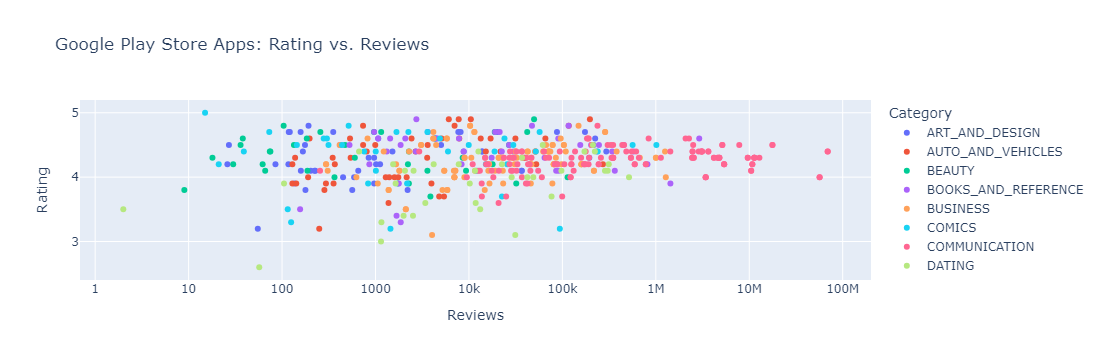

In [22]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Load the dataset
data_path = 'googleplaystore.csv'
data = pd.read_csv(data_path)

# Data cleaning and preparation
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data.dropna(subset=['Rating', 'Reviews'], inplace=True)
data = data.head(500)  # Limit the dataset for performance

# Create a scatter plot with Plotly
fig = px.scatter(data, x="Reviews", y="Rating", color="Category", hover_name="App",
                 title="Google Play Store Apps: Rating vs. Reviews",
                 log_x=True, size_max=15, height=600)

# Custom hover action to highlight points within the same category
def custom_hover(trace, points, selector):
    # This function is a placeholder to illustrate the idea.
    # Actual implementation of highlighting would require JavaScript callbacks with Plotly in a web environment.
    # Plotly's Python library doesn't support modifying graph properties in response to hover events directly in Jupyter.
    pass

fig.for_each_trace(lambda trace: trace.on_hover(custom_hover))

fig.show()
